In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [28]:
df = pd.read_csv('/workspaces/Proyecto_DataScience_Coder/data/raw/BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


In [29]:
df.head(1)

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month
0,2014-04-09,447.11,243742.0,122401,64992,38.678,239212041.0,0.139,0.0447,8.944,5587996110,4115.0,100.42,8193,11.193,0.502,179274,19.211,2014,4


Text(0.5, 1.0, 'Grafico precio BTC')

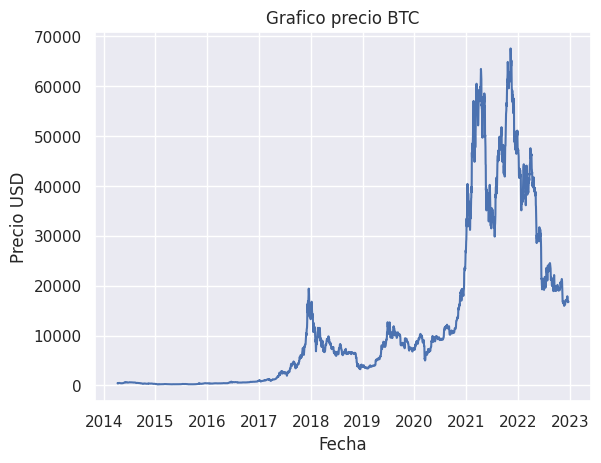

In [30]:
fig, ax = plt.subplots()
x = df.Date
y = df.priceUSD
ax.plot(x, y, label='Precio BTC')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Grafico precio BTC')


In [31]:
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
df.head()

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,...,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month,marketcap_en_MM
0,2014-04-09,447.110,243742.0,122401,64992,38.678,239212041.0,0.1390,0.0447,8.944,...,4115.0,100.420,8193,11.193,0.502,179274,19.211,2014,4,5.587996
1,2014-04-10,407.703,254334.0,124298,67872,31.917,310367120.0,0.0864,0.0408,9.290,...,4876.0,120.946,15039,13.854,0.371,182996,19.166,2014,4,5.020360
2,2014-04-11,403.328,223656.0,117926,65563,36.814,292756343.0,0.0858,0.0403,8.521,...,4819.0,108.481,14907,12.997,0.330,169622,19.141,2014,4,5.068920
3,2014-04-12,425.310,169964.0,87828,47579,34.498,157264741.0,0.0811,0.0425,8.944,...,3574.0,84.408,7582,9.229,0.226,132283,19.145,2014,4,5.329088
4,2014-04-13,415.876,162260.0,94828,50981,34.141,154756367.0,0.0840,0.0416,7.701,...,3332.0,69.681,10674,10.385,0.221,172708,19.131,2014,4,5.150415


Text(0.5, 1.0, 'Capitalizacion de mercado de BTC expresada en USD Miles de Millones')

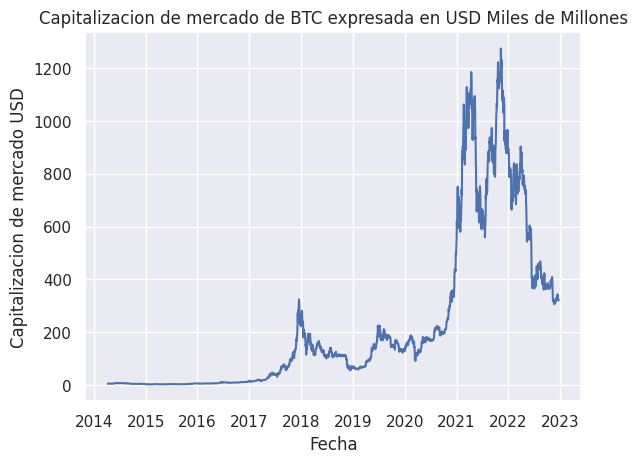

In [32]:
fig, ax = plt.subplots()
x = df.Date
y = df.marketcap_en_MM
ax.plot(x, y, label='Capitalizacion de mercado de BTC expresada en USD Miles de Millones')
ax.set_xlabel('Fecha')
ax.set_ylabel('Capitalizacion de mercado USD')
ax.set_title('Capitalizacion de mercado de BTC expresada en USD Miles de Millones')

Text(0.5, 1.0, 'Evolucion historica de transacciones con BTC')

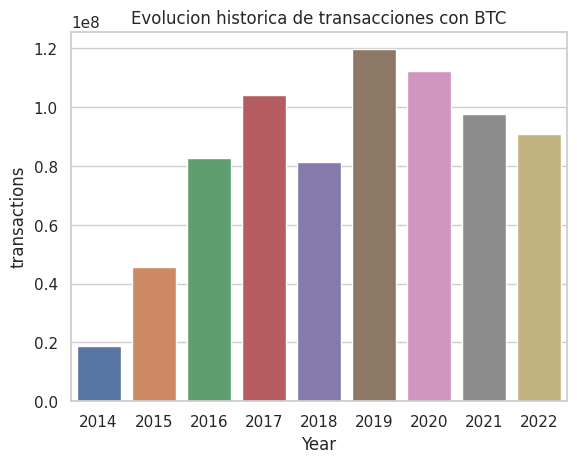

In [33]:
df_tran = df.groupby(['Year'])['transactions'].sum().reset_index()
df_tran.head(10)

sns.set_theme(style="whitegrid")

ax = sns.barplot(x="Year", y="transactions", data=df_tran)
ax.set_title('Evolucion historica de transacciones con BTC')

In [34]:
df_tran.head(10)



,Year,transactions
0,2014,18951966
1,2015,45618870
2,2016,82571772
3,2017,104010023
4,2018,81340729
5,2019,119726948
6,2020,112497226
7,2021,97743767
8,2022,90826733


/tmp/ipykernel_14794/378313730.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")


<AxesSubplot: xlabel='Year', ylabel='Month'>

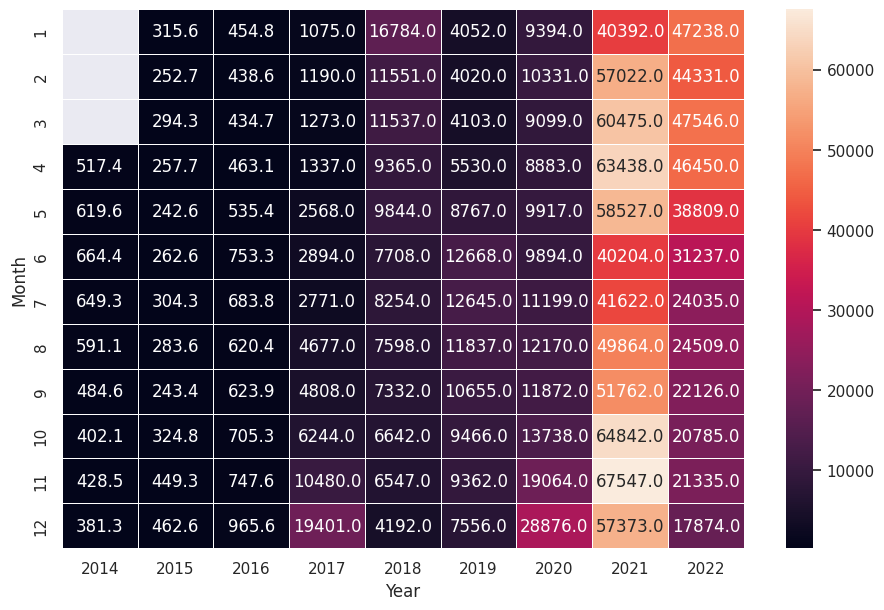

In [39]:
df_price_order = df.groupby(['Year', 'Month'])['priceUSD'].max().reset_index()
df_price_order.head(5)

sns.set_theme()

df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")

f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(df_price_order1, annot=True, fmt=".1f", linewidths=.5, ax=ax)